In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/'
power_data = pd.read_csv(path+'railsplitter-data.csv', parse_dates=True, index_col='Time')
power_data

,MWh
Time,
2016-11-01 01:00:00,7.3
2016-11-01 02:00:00,7.6
2016-11-01 03:00:00,6.5
2016-11-01 04:00:00,7.4
2016-11-01 05:00:00,7.9
...,...
2019-06-30 19:00:00,2.1
2019-06-30 20:00:00,1.4
2019-06-30 21:00:00,2.2


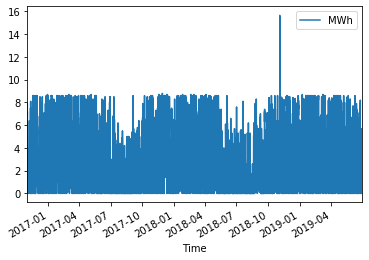

In [3]:
power_data.plot()

In [4]:
power_data[power_data['MWh']>9] = 8.8

There is a single data point that is nearly twice the maximum power that is supposed to be delivered to campus, I am forcing it to be the maximum value because there is only one in the entire dataset.

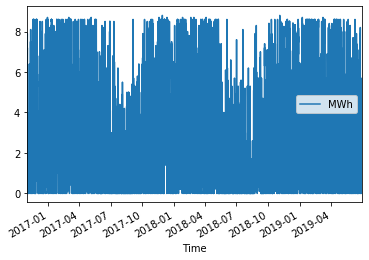

In [5]:
power_data.plot()

In [6]:
power_data.rename(columns={'Time':'time', 'MWh':'kw'})

,kw
Time,
2016-11-01 01:00:00,7.3
2016-11-01 02:00:00,7.6
2016-11-01 03:00:00,6.5
2016-11-01 04:00:00,7.4
2016-11-01 05:00:00,7.9
...,...
2019-06-30 19:00:00,2.1
2019-06-30 20:00:00,1.4
2019-06-30 21:00:00,2.2


In [7]:
years = power_data.groupby(power_data.index.year)

df17 = years.get_group(2017)
df18 = years.get_group(2018)

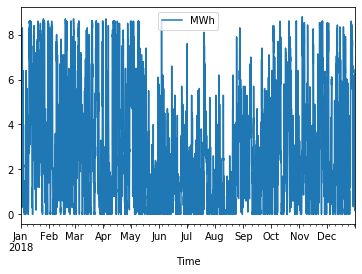

In [8]:
df18.plot()

In [9]:
df18['MWh'].sum()

23668.512

In [10]:
# df18.resample('H').mean()
df18

,MWh
Time,
2018-01-01 00:00:00,3.200
2018-01-01 01:00:00,2.900
2018-01-01 02:00:00,3.200
2018-01-01 03:00:00,2.900
2018-01-01 04:00:00,3.600
...,...
2018-12-31 19:00:00,6.106
2018-12-31 20:00:00,5.504
2018-12-31 21:00:00,6.450


Compare to wind speed model... 

In [11]:
power_model = pd.read_csv(path+"windHistories_2.csv")

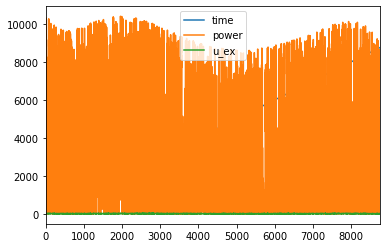

In [12]:
power_model.plot()

In [13]:
power_model['power'].sum()/1000

31735.332363779962

In [14]:
power_model[power_model['power']>8800]=8800
power_model['power'].sum()/1000

31274.653751118214

### Prepare and pass to RAVEN

I am grabbing the typical wind speeds from the ~typical wind power file~. Actually, I can just pull the data from the lincoln weather file.

In [15]:
typwind = pd.read_csv(path+"TypicalWind_0.csv")
typwind

,time,power,u_ex
0,0,2466.235188,7.671019
1,1,1608.215393,6.648217
2,2,1606.544253,6.648217
3,3,1261.117784,6.136815
4,4,5832.996234,10.228026
...,...,...,...
8755,8755,4035.120301,8.864289
8756,8756,4168.174301,8.949522
8757,8757,4301.228301,9.034756
8758,8758,4434.282301,9.119989


In [16]:
lincoln_wind = pd.read_csv(path+'lincoln_weather_clean.csv', parse_dates=True, index_col='time')
lincoln_wind

,temp,RH,pressure,u
time,,,,
2010-12-11 00:00:00,34.333333,90.666667,29.306667,6.000000
2010-12-11 01:00:00,32.000000,95.333333,29.293333,5.666667
2010-12-11 02:00:00,33.000000,95.333333,29.283333,8.333333
2010-12-11 03:00:00,34.000000,91.666667,29.270000,7.666667
2010-12-11 04:00:00,34.000000,93.000000,29.250000,6.666667
...,...,...,...,...
2019-12-12 22:00:00,40.000000,64.000000,29.433333,7.333333
2019-12-12 23:00:00,41.000000,63.666667,29.413333,8.000000
2019-12-13 00:00:00,40.000000,66.000000,29.396667,6.000000


In [17]:
wind_years = lincoln_wind.groupby(lincoln_wind.index.year)

In [18]:
wind17=wind_years.get_group(2017)
wind18=wind_years.get_group(2018)

In [19]:
# check if there are NaN values
print("The data frame is missing values:", wind17.isnull().values.any())

# interpolate
wind17 = wind17.interpolate(method='linear')

# check if there are NaN values
print("The data frame is missing values:", wind17.isnull().values.any())

The data frame is missing values: True
The data frame is missing values: False


In [20]:
# check if there are NaN values
print("The data frame is missing values:", wind18.isnull().values.any())

# interpolate
wind18 = wind18.interpolate(method='linear')

# check if there are NaN values
print("The data frame is missing values:", wind18.isnull().values.any())

The data frame is missing values: True
The data frame is missing values: False


In [21]:
df17['u'] = wind17['u']
df18['u'] = wind18['u']

/home/dotson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dotson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Date')

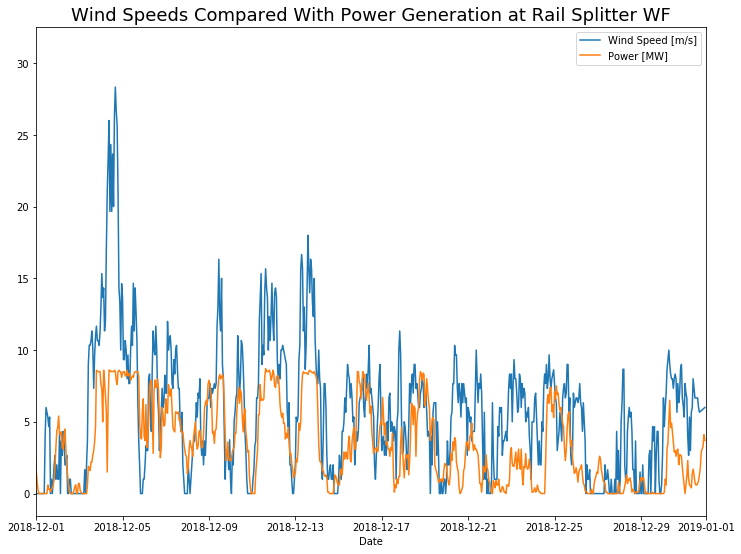

In [22]:
import datetime as dt
fig,ax = plt.subplots(figsize=(12,9))
ax.plot(df18.index, df17['u'], label='Wind Speed [m/s]')
ax.plot(df18.index, df17['MWh'], label='Power [MW]')
ax.set_xlim(dt.date(2018,12,1), dt.date(2019,1,1))
ax.legend()
ax.set_title("Wind Speeds Compared With Power Generation at Rail Splitter WF", fontsize=18)
ax.set_xlabel("Date")

In [23]:
df17.reset_index(inplace=True)
df17.rename(columns={'Time':'time','MWh':'mw'},inplace=True)
df17['time'] = df17.index
df17

/home/dotson/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/home/dotson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,mw,u
0,0,0.8,0.000000
1,1,0.2,0.000000
2,2,0.2,0.000000
3,3,0.1,0.000000
4,4,0.0,0.000000
...,...,...,...
8755,8755,2.9,5.777778
8756,8756,3.1,5.833333
8757,8757,3.3,5.888889
8758,8758,4.1,5.944444


In [24]:
df18.reset_index(inplace=True)
df18.rename(columns={'Time':'time','MWh':'mw'}, inplace=True)
df18['time'] = df18.index
df18

/home/dotson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,mw,u
0,0,3.200,5.666667
1,1,2.900,4.666667
2,2,3.200,6.000000
3,3,2.900,6.333333
4,4,3.600,7.333333
...,...,...,...
8755,8755,6.106,8.333333
8756,8756,5.504,8.333333
8757,8757,6.450,7.333333
8758,8758,4.472,8.000000


In [25]:
# writes the header file for RAVEN
fname = 'railsplitter_data201'
sun_keys = [fname + str(i) + '.csv' for i in range(7,9,1)]
header_file = pd.DataFrame({'scaling':np.zeros(len(sun_keys), dtype=np.int8), 'filename':sun_keys})
header_file.to_csv(path+'railsplitter_H.csv')

In [26]:
df17.to_csv(path+"railsplitter_data2017.csv")
df18.to_csv(path+"railsplitter_data2018.csv")

In [27]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/typical_railsplitter.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.04 sec) HistorySet               : DEBUG           -> Reading data from "/home/dotson/Research/data/railsplitter_data2018.csv.csv"
(    0.05 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.05 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.05 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.05 sec) SIMULATION               : Message         -> -- End step read of type: IOStep                               --

(    0.05 sec) SIMULATION               : Message         -> -- Beginning step get_history of type: PostProcess                  --
(    0.05 sec) STEP SINGLERUN           : Message         -> ***  Beginning initialization ***
(    0.05 sec) STEP SINGLERUN           : DEBUG           -> jobHandler initialized
(    0.05 sec) STEP SINGLERUN           : DEBUG           -> for the role Model  the item of class PostProcessor   and name typicalHistory

(    0.18 sec) HistorySet               : DEBUG           -> Printing metadata XML: "TypicalRailSplitter.xml"
(    0.18 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.18 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.18 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.18 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

--------------------------------------------------
There were 1 warnings during the simulation run:
(1 time) DataObject._convertToDict can be a slow operation and should be avoided where possible!
--------------------------------------------------
(    0.18 sec) SIMULATION               : Message         -> Run complete!


In [28]:
typical_railsplitter = pd.read_csv(path+"TypicalRailSplitter_0.csv")

typical_railsplitter['date'] = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')[:8760]

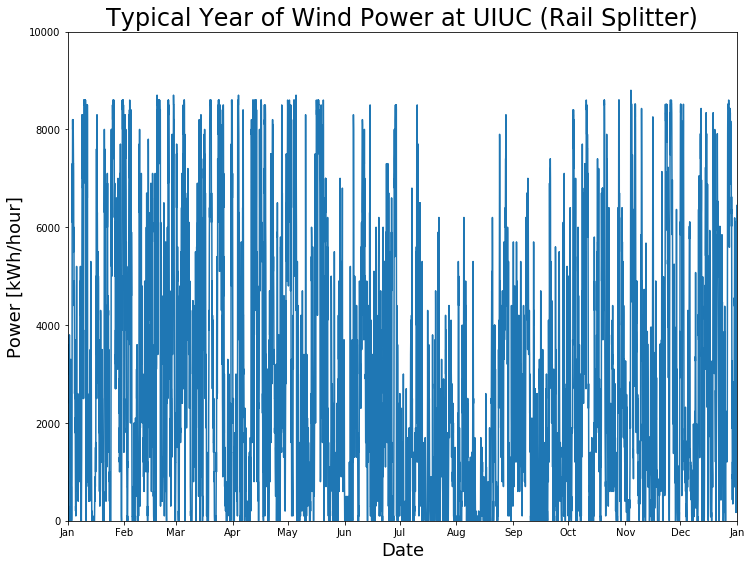

In [29]:
import matplotlib.dates as mdates
import datetime


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig,ax = plt.subplots(1,1,figsize=(12,9), edgecolor='k', facecolor='w')
ax.plot(typical_railsplitter.date, typical_railsplitter.mw*1000)
ax.set_title('Typical Year of Wind Power at UIUC (Rail Splitter)', fontsize=24)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Power [kWh/hour]',fontsize=18)
ax.set_xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
ax.set_ylim(0, 10000)
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

In [32]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/railsplitter_arma.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.11 sec) ARMA                     : DEBUG           -> ... analyzing Fourier signal  for target "u" ...
(    0.12 sec) ARMA                     : DEBUG           -> ... analyzing ARMA properties for target "mw" ...
/home/dotson/Research/raven/framework/SupervisedLearning/ARMA.py:635: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y[[a[divZero] for a in np.where(inMask)]] =  0.5*(Yhigh[divZero] + Ylow[divZero])
/home/dotson/Research/raven/framework/SupervisedLearning/ARMA.py:645: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y[[a[okay

(  569.72 sec) HistorySet               : DEBUG           -> Printing metadata XML: "RailSplitterHistories.xml"
(  569.72 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(  569.72 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(  569.72 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(  569.72 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

(  569.72 sec) SIMULATION               : Message         -> Run complete!


In [33]:
synthetic_history = pd.read_csv(path+"RailSplitterHistories_2.csv")

Text(0.5, 1.0, 'Synthetic and Typical Wind Power Histories (Rail Splitter)')

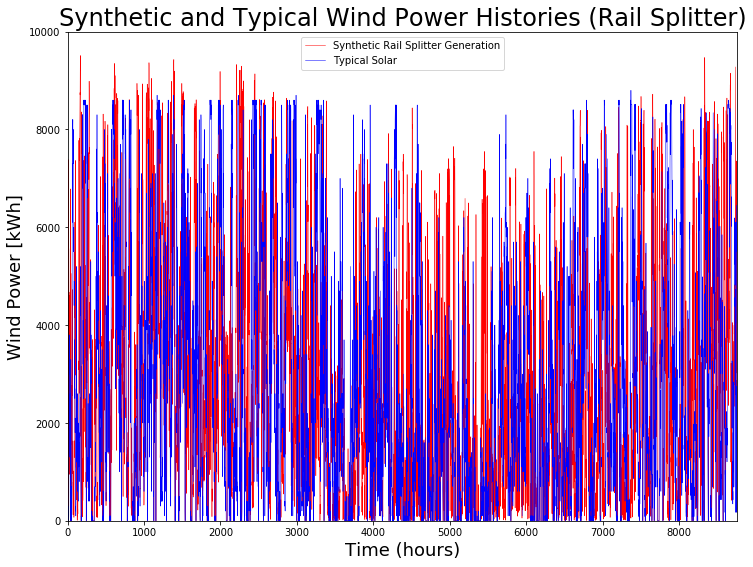

In [35]:
# plot synthetic history
fig,ax = plt.subplots(1,1,figsize=(12,9), edgecolor='k', facecolor='w')
ax.plot(synthetic_history['time'], synthetic_history['mw']*1000, 
         color='r',lw = 0.5, label='Synthetic Rail Splitter Generation')
ax.plot(typical_railsplitter['time'], typical_railsplitter['mw']*1000, 
         color='b', lw=0.5, label='Typical Solar')
ax.set_ylabel("Wind Power [kWh]", fontsize=18)
ax.set_xlabel("Time (hours)", fontsize=18)
ax.set_ylim(0,10000)
ax.set_xlim(0,8760)
ax.legend()
ax.set_title("Synthetic and Typical Wind Power Histories (Rail Splitter)", fontsize=24)